In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


1) Dự đoán chiều cao dựa vào cân nặng

In [3]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [6]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


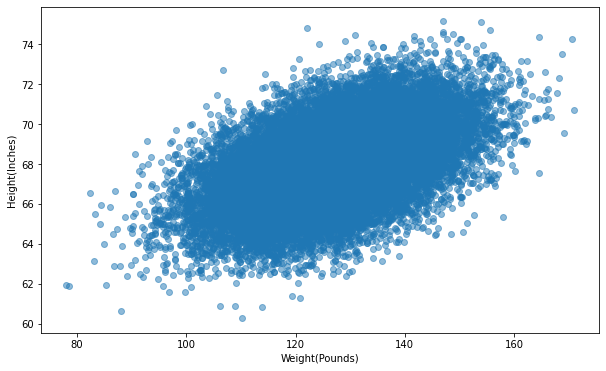

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'], alpha=0.5)
plt.xlabel('Weight(Pounds)')
plt.ylabel('Height(Inches)')
plt.show()

Mức độ tương quan thuận

In [137]:
X = df['writing score'].values.reshape(-1, 1)
y = df['reading score'].values


In [138]:
# Huấn luyện mô hình
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [139]:
X_test

array([[ 80],
       [ 83],
       [ 36],
       [ 74],
       [ 77],
       [ 80],
       [ 61],
       [ 53],
       [ 66],
       [ 80],
       [ 99],
       [ 76],
       [ 66],
       [ 37],
       [ 54],
       [ 65],
       [ 52],
       [ 78],
       [ 74],
       [ 60],
       [ 78],
       [ 80],
       [ 47],
       [ 56],
       [ 62],
       [ 70],
       [ 53],
       [ 70],
       [ 62],
       [ 59],
       [ 68],
       [ 78],
       [ 86],
       [ 69],
       [ 81],
       [ 94],
       [ 90],
       [ 34],
       [ 80],
       [ 94],
       [ 41],
       [ 47],
       [ 67],
       [ 63],
       [ 64],
       [ 81],
       [ 73],
       [ 95],
       [ 78],
       [ 60],
       [ 75],
       [ 41],
       [ 64],
       [ 61],
       [ 66],
       [ 69],
       [ 62],
       [ 66],
       [ 36],
       [ 68],
       [ 48],
       [ 72],
       [ 23],
       [ 69],
       [ 58],
       [ 68],
       [ 74],
       [ 78],
       [ 73],
       [ 68],
       [ 63],
      

In [143]:
y_pred = model.predict(X_test)
y_pred

array([80.18395492, 82.9297428 , 39.91239934, 74.69237916, 77.43816704,
       80.18395492, 62.79396501, 55.471864  , 67.37027814, 80.18395492,
       97.57394482, 76.52290441, 67.37027814, 40.82766197, 56.38712662,
       66.45501552, 54.55660137, 78.35342966, 74.69237916, 61.87870238,
       78.35342966, 80.18395492, 49.98028824, 58.21765188, 63.70922764,
       71.03132865, 55.471864  , 71.03132865, 63.70922764, 60.96343976,
       69.2008034 , 78.35342966, 85.67553068, 70.11606602, 81.09921754,
       92.99763169, 89.33658118, 38.08187409, 80.18395492, 92.99763169,
       44.48871248, 49.98028824, 68.28554077, 64.62449026, 65.53975289,
       81.09921754, 73.77711653, 93.91289432, 78.35342966, 61.87870238,
       75.60764178, 44.48871248, 65.53975289, 62.79396501, 67.37027814,
       70.11606602, 63.70922764, 67.37027814, 39.91239934, 69.2008034 ,
       50.89555086, 72.8618539 , 28.0139852 , 70.11606602, 60.04817713,
       69.2008034 , 74.69237916, 78.35342966, 73.77711653, 69.20

In [146]:
print('Kết quả mô hình: ')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Kết quả mô hình: 
R2 Score: 0.9102
RMSE: 4.2860


Từ kết quả R2 là 0.9102 cho thấy mô hình có 

Root Mean Squared Error (RMSE):

Ý nghĩa: RMSE là độ lệch trung bình bình phương căn bậc hai giữa các giá trị dự đoán của mô hình và các giá trị thực tế. Nó đo lường mức độ sai số trung bình của mô hình.
Giá trị: Giá trị RMSE càng nhỏ, mô hình càng chính xác.

R-squared (R²):

Ý nghĩa: R² cho biết tỷ lệ phương sai của biến phụ thuộc (y) được giải thích bởi biến độc lập (x) trong mô hình. Nói cách khác, nó đo lường mức độ mà mô hình hồi quy có thể giải thích được sự biến động của dữ liệu.
Giá trị: Giá trị R² nằm trong khoảng từ 0 đến 1.
Gần 1: Mô hình giải thích rất tốt sự biến động của dữ liệu.
Gần 0: Mô hình giải thích kém sự biến động của dữ liệu.